In [22]:
import numpy as np
import matplotlib.pyplot as plt

from proj1_helpers import load_csv_data
from cross_validation import cross_validation, build_k_indices
from helpers import compute_accuracy
from implementations import ridge_regression
from data_processing import clean_data, expand_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading data 

In [2]:
y_tr, tx_tr, ids_tr = load_csv_data("data/train.csv")
y_te, tx_te, ids_te = load_csv_data("data/test.csv")

In [3]:
tx_tr

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [4]:
tx_te

array([[-999.   ,   79.589,   23.916, ..., -999.   , -999.   ,    0.   ],
       [ 106.398,   67.49 ,   87.949, ..., -999.   , -999.   ,   47.575],
       [ 117.794,   56.226,   96.358, ..., -999.   , -999.   ,    0.   ],
       ...,
       [ 108.497,    9.837,   65.149, ..., -999.   , -999.   ,    0.   ],
       [  96.711,   20.006,   66.942, ..., -999.   , -999.   ,   30.863],
       [  92.373,   80.109,   77.619, ..., -999.   , -999.   ,    0.   ]])

In [5]:
y_tr

array([ 1., -1., -1., ...,  1., -1., -1.])

In [6]:
y_te

array([1., 1., 1., ..., 1., 1., 1.])

# Data analysis and processing

In [7]:
tx_tr.max(axis=0)

array([1.192026e+03, 6.900750e+02, 1.349351e+03, 2.834999e+03,
       8.503000e+00, 4.974979e+03, 1.669000e+01, 5.684000e+00,
       2.834999e+03, 1.852462e+03, 1.977300e+01, 1.414000e+00,
       1.000000e+00, 7.644080e+02, 2.497000e+00, 3.142000e+00,
       5.602710e+02, 2.503000e+00, 3.142000e+00, 2.842617e+03,
       3.142000e+00, 2.003976e+03, 3.000000e+00, 1.120573e+03,
       4.499000e+00, 3.141000e+00, 7.214560e+02, 4.500000e+00,
       3.142000e+00, 1.633433e+03])

In [8]:
tx_tr.min(axis=0)

array([-9.9900e+02,  0.0000e+00,  6.3290e+00,  0.0000e+00, -9.9900e+02,
       -9.9900e+02, -9.9900e+02,  2.0800e-01,  0.0000e+00,  4.6104e+01,
        4.7000e-02, -1.4140e+00, -9.9900e+02,  2.0000e+01, -2.4990e+00,
       -3.1420e+00,  2.6000e+01, -2.5050e+00, -3.1420e+00,  1.0900e-01,
       -3.1420e+00,  1.3678e+01,  0.0000e+00, -9.9900e+02, -9.9900e+02,
       -9.9900e+02, -9.9900e+02, -9.9900e+02, -9.9900e+02,  0.0000e+00])

In [9]:
tx_tr.mean(axis=0)

array([-4.90230794e+01,  4.92398193e+01,  8.11819816e+01,  5.78959617e+01,
       -7.08420675e+02, -6.01237051e+02, -7.09356603e+02,  2.37309984e+00,
        1.89173324e+01,  1.58432217e+02,  1.43760943e+00, -1.28304708e-01,
       -7.08985189e+02,  3.87074191e+01, -1.09730480e-02, -8.17107200e-03,
        4.66602072e+01, -1.95074680e-02,  4.35429640e-02,  4.17172345e+01,
       -1.01191920e-02,  2.09797178e+02,  9.79176000e-01, -3.48329567e+02,
       -3.99254314e+02, -3.99259788e+02, -6.92381204e+02, -7.09121609e+02,
       -7.09118631e+02,  7.30645914e+01])

In [10]:
tx_tr.std(axis=0)

array([406.34483401,  35.34481492,  40.82860887,  63.65555431,
       454.47965615, 657.97098617, 453.01897051,   0.78290955,
        22.2734492 , 115.70588372,   0.84474126,   1.19358245,
       453.59581401,  22.41203584,   1.21407622,   1.81675941,
        22.06487828,   1.26497962,   1.81660763,  32.8946274 ,
         1.81221908, 126.49925272,   0.97742435, 532.96172343,
       489.33730734, 489.33290465, 479.87453609, 453.38371728,
       453.3881105 ,  98.01546598])

Identifying missing values:

In [11]:
np.count_nonzero(tx_tr == -999)

1580052

Cleaning data, standardizing and adding constant column

In [16]:
tx_tr = clean_data(tx_tr)
tx_te = clean_data(tx_te)

np.count_nonzero(tx_tr == -999)

0

In [17]:
tx_tr

array([[ 1.38470000e+02,  5.16550000e+01,  9.78270000e+01, ...,
         1.24000000e+00, -2.47500000e+00,  1.13497000e+02],
       [ 1.60937000e+02,  6.87680000e+01,  1.03235000e+02, ...,
        -1.18452642e-02, -1.58228913e-03,  4.62260000e+01],
       [ 1.21858528e+02,  1.62172000e+02,  1.25953000e+02, ...,
        -1.18452642e-02, -1.58228913e-03,  4.42510000e+01],
       ...,
       [ 1.05457000e+02,  6.05260000e+01,  7.58390000e+01, ...,
        -1.18452642e-02, -1.58228913e-03,  4.19920000e+01],
       [ 9.49510000e+01,  1.93620000e+01,  6.88120000e+01, ...,
        -1.18452642e-02, -1.58228913e-03,  0.00000000e+00],
       [ 1.21858528e+02,  7.27560000e+01,  7.08310000e+01, ...,
        -1.18452642e-02, -1.58228913e-03,  0.00000000e+00]])

# Cross validation: plots and trials

In [41]:
from plots import cross_validation_visualization

def cross_validation_demo2():
    seed = 10
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-5, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

Test: d =  7 ; l =  1e-07
Accuracy =  0.802368 ; loss =  0.28828167878236366 



NameError: name 'compute_mse' is not defined

Test: d =  7 ; l =  1e-07
Accuracy =  0.69428 ; loss =  0.586574698651989 

Test: d =  7 ; l =  1e-07
Accuracy =  0.790184 ; loss =  92492388815.61824 

Test: d =  7 ; l =  2.592943797404667e-07
Accuracy =  0.777776 ; loss =  0.41091442465023337 

Test: d =  7 ; l =  2.592943797404667e-07
Accuracy =  0.62848 ; loss =  92479507595.86919 

Test: d =  7 ; l =  6.723357536499335e-07
Accuracy =  0.800016 ; loss =  0.38041910878951435 

Test: d =  7 ; l =  6.723357536499335e-07
Accuracy =  0.790344 ; loss =  92446409881.68675 

Test: d =  7 ; l =  1.7433288221999873e-06
Accuracy =  0.801496 ; loss =  0.3773701361859141 

Test: d =  7 ; l =  1.7433288221999873e-06
Accuracy =  0.806224 ; loss =  92392481319.74359 

Test: d =  7 ; l =  4.520353656360241e-06
Accuracy =  0.802048 ; loss =  0.3773616119285406 

Test: d =  7 ; l =  4.520353656360241e-06
Accuracy =  0.807192 ; loss =  92346367562.94398 

Test: d =  7 ; l =  1.1721022975334793e-05
Accuracy =  0.802384 ; loss =  0.3769454869164622 

T

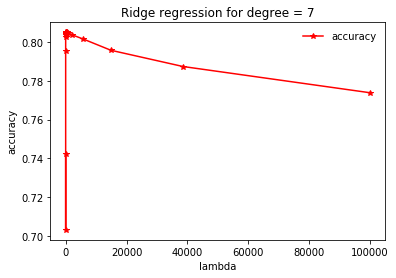

In [38]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 10
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-6, 1, 12)
    degrees = range(2,11)
    #lambda_= 100
    # split data in k fold
    k_indices = build_k_indices(y_tr, k_fold, seed)
    # define lists to store the loss of training data and test data
    acc_te = []
    mse_te = []
    # cross validation
    for lambda_ in lambdas:
        acc_tmp = []
        mse_te_tmp = []
        for k in range(k_fold):
            loss_te, acc = cross_validation(y_tr, tx_tr, k_indices, k, lambda_, degree)
            mse_te_tmp.append(loss_te)
            acc_tmp.append(acc)
        mse_te.append(np.mean(mse_te_tmp))
        acc_te.append(np.mean(acc_tmp))

        
    plt.plot(lambdas, acc_te, color='r', marker='*', label="accuracy")
    #plt.semilogx(lambdas, mse_te, color='r', marker='*', label="Test error")
    #plt.ticklabel_format(style='plain')
    plt.xlabel("lambda")
    plt.ylabel("accuracy")
    plt.title("Ridge regression for degree = " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression2")

cross_validation_demo()

Test: d =  7 ; l =  1.0
Accuracy =  0.74096 ; loss =  0.6236030066165184 

Test: d =  7 ; l =  1.0
Accuracy =  0.806944 ; loss =  38380149038.85161 

Test: d =  7 ; l =  2.7825594022071245
Accuracy =  0.802128 ; loss =  0.4113771000760854 

Test: d =  7 ; l =  2.7825594022071245
Accuracy =  0.807 ; loss =  38416234401.02982 

Test: d =  7 ; l =  7.742636826811269
Accuracy =  0.681584 ; loss =  0.6967098723697063 

Test: d =  7 ; l =  7.742636826811269
Accuracy =  0.807008 ; loss =  38484585036.29828 

Test: d =  7 ; l =  21.544346900318832
Accuracy =  0.786272 ; loss =  0.43098264501697275 

Test: d =  7 ; l =  21.544346900318832
Accuracy =  0.806992 ; loss =  38563632777.0241 

Test: d =  7 ; l =  59.94842503189409
Accuracy =  0.802728 ; loss =  0.39896782548864057 

Test: d =  7 ; l =  59.94842503189409
Accuracy =  0.807064 ; loss =  38473939029.72595 

Test: d =  7 ; l =  166.81005372000593
Accuracy =  0.80304 ; loss =  0.3829284891391729 

Test: d =  7 ; l =  166.81005372000593
Acc

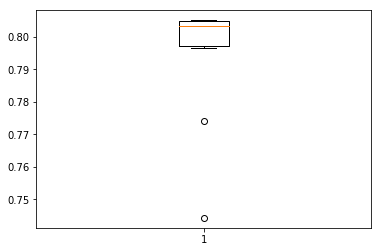

In [40]:
def extended_cross_validation_demo():
    seed = 10
    degree = 7
    k_fold = 2
    lambdas = np.logspace(0, 4, 10)
    # split data in k fold
    k_indices = build_k_indices(y_tr, k_fold, seed)
    # define lists to store the loss of training data and test data
    acc_te = []
    mse_te = []
    # cross validation
    for lambda_ in lambdas:
        acc_tmp = []
        mse_te_tmp = []
        for k in range(k_fold):
            loss_te, acc = cross_validation(y_tr, tx_tr, k_indices, k, lambda_, degree)
            mse_te_tmp.append(loss_te)
            acc_tmp.append(acc)
        mse_te.append(np.mean(mse_te_tmp))
        acc_te.append(np.mean(acc_tmp))

    plt.boxplot(acc_te)

extended_cross_validation_demo()

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  1.131346404108219

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.832522502602638

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8782525492590028

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  1.094708922504505

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.1313463956723355

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8325225065149485

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8782525462032109

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.0947089289579681

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  1.1313463808461814

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.832522513390875

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8782525408326245

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  1.0947089402999972

Test: d 

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9469341215779038

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.305567778373979

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9485611304745397

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0146151972657231

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9735309841271961

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.3260039270659667

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9467598891998573

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0269501514603

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.000648885022742

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.3394295276630068

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9475072040371182

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.034719100

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.758445377007326

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.910235406753816

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7963047175123401

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7572138614020044

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7582753450085234

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.9101973296014896

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7967747942374978

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7568752616080899

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7579769202359495

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.9101305194533108

Test: d =  3 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7975978429686671

Test: d =  3 ; l =  0.025595479226995333
Accu

Accuracy =  0.0 ; loss =  1.0459282509491963

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.0409633883111629

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.3594481126096065

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  0.9481275846279851

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.045950933356925

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.0410445084704003

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.3594823884962466

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  0.9481343089543572

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.0459638454352402

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.0410906902996921

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.3595019030501645

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8009988309752447

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7739089692685559

Test:

Accuracy =  0.0 ; loss =  0.7174987159248217

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9279130876551068

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9215603722727697

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7308058298473421

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7044866576906293

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9637450612884382

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9734360000249106

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7525188438386267

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.720622703620346

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  1.028284571960384

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  1.0368898132103228

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7944657121274118

Test: d =  4 ; l =  7.1968567300

Accuracy =  0.0 ; loss =  1.021066307031971

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.9894142197712167

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  1.0197034294780714

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.8411904007813309

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  1.0210663759996388

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.9894156549136658

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  1.019704181212069

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8411881567001646

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  1.0210664972210517

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.9894181771000717

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  1.0197055023706703

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.84118

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2497334484235334

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  0.9153479266218021

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.3299193184399665

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1966604280296078

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2497653321055

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  0.9153699337192022

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.3299603479934623

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1966907218694465

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2497834768696514

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  0.9153824568891178

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.329983697281255

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.19670796003347

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.605795561555802

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6392741620348454

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7496154088032759

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.5308469701883872

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6075453910172425

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6343676428762602

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7489881644692622

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.5284469920639924

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6105631246536519

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6270206314284478

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7504947838016348

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss = 

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6468066392058232

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7510352518189664

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.5661653537313227

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6057305394067164

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6468065766674926

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7510352407305112

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.5661651891871002

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6057305574932109

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6468064667557373

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.75103522124244

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.5661648999990219

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6057305892803942

Test: 

Accuracy =  0.0 ; loss =  0.9786541531348492

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7968709486076164

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.9637600173264411

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7628553531704596

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.9786541468558356

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7968709685995525

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.9637599703847612

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7628553795690631

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9786541358204014

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7968710037355552

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9637598878843534

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.76285542

Accuracy =  0.0 ; loss =  1.1174742632499577

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.140297380631544

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1111966574673235

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1748948697803638

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.134989062214965

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1521706162681962

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1447234845815937

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.191008922712561

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1453742587414508

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1590849838420354

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1657319790440765

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.200661842430727

Test: d =  2 ; l =  2023.58964

Accuracy =  0.0 ; loss =  0.8051389748952492

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.6356726696036533

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.6602657185197108

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7178371932723868

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.8050355999669757

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.6359677905181872

Test: d =  3 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.6603263509877246

Test: d =  3 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7182508589525015

Test: d =  3 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.8048546340997196

Test: d =  3 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6364843660709871

Test: d =  3 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6604325947222675

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.7191515326078443

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7726300671593468

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6048179378151528

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6121502432837036

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8118411616017093

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7726300758772272

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6048177891667095

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6121502316794099

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8118412961559054

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7726300911988235

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6048175279157569

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6121502112846328

Test: d =  4 ; l =  1.6768329

Accuracy =  0.0 ; loss =  1.0510117757212336

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0880532704602108

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0925090725052844

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0999030771780827

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0744604904299955

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.088529979387216

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1223988814016446

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.105440945193043

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1095373060380016

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1030822459840086

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1421064371715421

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1040049593923655

Test: d =  4 ; l =  655.1285

Accuracy =  0.0 ; loss =  0.9257141279844382

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9595368491010453

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.8988199267313332

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.8820812459766635

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9256106389212431

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9596498771747536

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8987219891897986

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8822680692488194

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9254291444956348

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.9598482673544801

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8985503030192991

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8825957458494726

Test: d =  

Accuracy =  0.0 ; loss =  1.074728236714014

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.736280356889039

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.658141025242311

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6996192628761506

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6485183138908107

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7362803491428065

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6581410278272082

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6996192195897774

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6485183482873689

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7362803355287258

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6581410323701894

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6996191435135533

Test: d =  3 ; l =  3.0888435964774785e-06
Accurac

Accuracy =  0.0 ; loss =  1.1034234041809508

Test: d =  3 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0799699910235159

Test: d =  3 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0892122546811933

Test: d =  3 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9816427630351425

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1271644287992768

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1167656634544898

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1085271000928287

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.006224089927942

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1444388030727555

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1450307729741667

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.121771759930071

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0233188255751884

Test: d =  3 ; l =  2023.589

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6993635646973945

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6574509013667419

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7499476956347718

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6554338973982403

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6992988072101596

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6574951886038048

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7498817532404766

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.6554429895879667

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.6991850701833591

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.6575729707512779

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7497662565977372

Test: d =  4 ; l =  0.008286427728546

Accuracy =  0.0 ; loss =  1.14266699548493

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.0746598607563056

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8755780522744503

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9706575754230116

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  1.0184756955226006

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8502553677312552

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8755780560252016

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9706575711673922

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.018475700206878

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8502553637974983

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8755780626171854

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.970657563688096

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; los

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1264391020391198

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.278828718803797

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9655853947123162

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9605755753805263

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1519142833748413

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.2998550840421537

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0017489751399646

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9637960723803742

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1686980035067362

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.3129661611665548

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.023883696658054

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  0.96703524

Accuracy =  0.0 ; loss =  0.8060226649890345

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7481523202638394

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6066271578537668

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6864669273602269

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8038010880968913

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7507847939686868

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6076529590552124

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6906431141498364

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7999459096634907

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7552057385941304

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6095575960238212

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7010433125336695

Test: d =  3 ; l =

Accuracy =  0.0 ; loss =  1.1924720729141338

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.3317061698315733

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.054953455740824

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  0.9729592090389247

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1925168115875264

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.3317311550432442

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.0550053673502582

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7658019335137496

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6397966785232966

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7436744802191759

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8103995107361939

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.765801952414942

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6397966884244495

Test: d =  4 ; l =  

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.257155179417183

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9359487522412775

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9677257400211362

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1348362709454898

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.2838981043659041

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9677314982089894

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  0.9680932571459961

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1484263512006008

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.3023671916802615

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0011763682742703

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  0.968262091828237

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.165656

Accuracy =  0.0 ; loss =  0.9408075256760189

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9519843751341149

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7802053501701641

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7825916232242063

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9402440330012104

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9519579249537303

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7802847117881424

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7831868666713901

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.939258414732799

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.9519116082331619

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7804257271752101

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7842273825556069

Test: d =  2 ; l 

Accuracy =  0.0 ; loss =  0.6837408968175167

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7015143874567618

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6953262249271126

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.5685276225561243

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6837386156085413

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7015148766663689

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.695327372812028

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.5685252489794962

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6837346063912951

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7015157364440265

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6953293901976347

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.56

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1378117772550855

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.131799883815463

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0234113701140475

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.2694331454435228

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1496598602290926

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.143705201690973

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0324582757483225

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2801455493924054

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.15695347809205

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.153625853396733

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0378283290550625

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.28661

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7340014676439063

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7248655828744978

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.571236928521158

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7018256542723158

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.738699357587574

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7342298605829526

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.5569395410673075

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6880092513038751

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7458178077201297

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7503581338280922

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.5469318183514835

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9488259488619352

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0227693152585786

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9600942561458501

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.1371732408110213

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.9488259032540878

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.022769311035566

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.9600941050170368

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.1371732689214877

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.948825823098263

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.0227693036136283

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.9600938394067489

Test: d =  2 ; l =  9.102981779915228

Accuracy =  0.0 ; loss =  1.166565576654679

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0085928874425882

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.3035297677218252

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.16770727345916

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1681773024807824

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0119446977037418

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.304197366702674

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1685215422728694

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1690995942368279

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.013860201016372

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3045783503253117

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1689863353845056

Test: d =  2 ; l =  19306.97

Accuracy =  0.0 ; loss =  0.8264317493113713

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8293609100408604

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7777017357245772

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7650905013772343

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.8329924542459644

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.8205205683409855

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7803684703731971

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.762226883635368

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.8436633586118314

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.8077836399325116

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7847089657332916

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7574078318199671

Test: d =  3 ; l =  

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8220317054061326

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8417545805115857

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7810444509469243

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7686420080791603

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8220361687114678

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8417480471183717

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7810459740307324

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7686400178130648

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.8220440126141897

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.84173656518418

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7810486507566523

Test: d =  4 ; l =  0.00028117

Accuracy =  0.0 ; loss =  0.9800982281245585

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2940322160640585

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1616843857771493

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1608727365760707

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  0.9931712601916745

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2985458448288325

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1650362302517019

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1648588220156875

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0009672813751511

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.3012754249762515

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1669839893536096

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.16718502422416

Test: d =  4 ; l =  10985

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8762418876351801

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7343546409282059

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9914178667386321

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8440678775167719

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8764461528465143

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7377272326220131

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9940894909734629

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8443435437932996

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8765431258984

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7434873488503889

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9987611598882205

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.843962710

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6324910115021759

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6765897013001888

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7247828674888015

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7191268407986705

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6324914808358025

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6765869210612763

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7247870183979827

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7191256146330076

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6324923056974203

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.676582034841918

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7247943133634467

Test: d =  3 ; l =  0.0001

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0457649316439508

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0321667580277627

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1569484103718877

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.2708665377885935

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0701351682333575

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0469913961128874

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.176677266589128

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.2845580256274516

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0860604511761767

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.056727805911452

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1908425842081538

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2

Accuracy =  0.0 ; loss =  0.7187818444985834

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7080958410437689

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.647276621111425

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6832956683008562

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7223115062947841

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7059648723082171

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6568002016139443

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6771950637453978

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7319290966798333

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7040573315011873

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6719335975643007

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6707221790993056

Test: d =  4 ; l =  0

Accuracy =  0.0 ; loss =  1.0711501486296666

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2144266702560644

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.3085343780503367

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1104303556604884

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.956568083192156

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9511029718792263

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9669481579387892

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.96469757645161

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9565680820263447

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9511029742979217

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9669481552248045

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.96469757956255

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9565680799774189

Te

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0052699185869107

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1565356281750139

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9743139176116504

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1355591396760656

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.03822209442215

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1946109683241941

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0101550315940842

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1586211373008628

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.069355128844373

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.2222716667678446

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0335999064270809

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.17358

Test: d =  3 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7335054457318536

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.669707587441468

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.7453384136583431

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.7482918496180646

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.7355305380871002

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6608959436382896

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7436997900957274

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7476237055895225

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7390245104477003

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.645560210060813

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7411206346666048

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; 

Accuracy =  0.0 ; loss =  0.704546154590523

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6162123477719657

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7511688823534131

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7443062562873791

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7045464252565731

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6162118928785303

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7511687370416599

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7443062036721816

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7045469009539438

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6162110933988212

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.751168481655998

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.744306111

Accuracy =  0.0 ; loss =  1.0078109581464239

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1140104799103752

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0031942695403362

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.161202489643172

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9875395971590792

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1356331238395025

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.016128203062753

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1895377473713606

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.004973812547304

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1537219129350695

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0430117589120287

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.213780687464625

Test: d =  4 ; l =  655.128

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.0830739020651248

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.013658304833106

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.120669519431109

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9877530797508697

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.0830599678539565

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  1.0136520338492216

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  1.1206669824587265

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.9877924614413678

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  1.0830354845155459

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  1.01364101742988

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  1.1206625241820527

Test: d =  2 ; l =  0.014563484775012445
Accur

Accuracy =  0.0 ; loss =  0.8018517998589526

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6214350592551152

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8517152730351519

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.5528776932356699

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8018516514071176

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6214351886081018

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8517154305557987

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.5528776474788514

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8018513905015446

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6214354159470011

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8517157073995616

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.2464733340466738

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.3001949654620701

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0876115018724646

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.033293530394938

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.2460548496462585

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.3104379623109148

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1278175066191514

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0421453549609563

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.245647624984614

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.3170736396242435

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1547828988547038

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.053

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.621976777575108

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.8632131827729949

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.5493086355800743

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.782928452507869

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6224119240070569

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.8638598009759998

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.5491336505595168

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7818290670093664

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.6231757078120154

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.864989522152535

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.5488261903341187

Test: d =  4 ; l =  0.04498432668969444
Accuracy 

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2448748783660344

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.3269474763186457

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1961596753914987

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9429014244984165

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  1.0989271955561029

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9185733172071123

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9517641190382259

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9429014180896816

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.0989271985707354

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9185733200641527

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9517641083078391

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9429014068262634

Test: d =  2 ; l =  3.0888435964774785e-06


Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9737024572530607

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.851312072967376

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9023184893724134

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.1672354893154515

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0027157471298498

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.838833088307849

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9017554003403814

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1914194115221082

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0399073548301436

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8704459638607115

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9029130201446193

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.214409

Accuracy =  0.0 ; loss =  0.6546578504042877

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7711286225834512

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6146215044158162

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7564613622384084

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.654621858059045

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7710752244919866

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6145746569357248

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7565645166249175

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6545586129780221

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7709813893776031

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6144923615589926

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.756745648

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2698250822976325

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2300146770706575

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.0916083931396738

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  0.9452541230594897

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2698305241914742

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2300571522729022

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.0916580602751063

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7076945847233804

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7601461621664808

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6552288653336162

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7853040404782826

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7076944514127586

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  

Accuracy =  0.0 ; loss =  1.0017502929130138

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8544507226005478

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9273181401235198

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.2019769470104054

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0358856173749411

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8923218735131925

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9287979307465145

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.2209659042770264

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0617155576628008

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9129216371659296

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9254988497301259

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.2349939480727863

Test: d =  4 ; l =  120.679

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.102405836609475

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.0212342647603714

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9777994031031173

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9000476277211824

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.1023972009182204

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  1.0212223300553436

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.9777903339869699

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.9000494679314642

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  1.1023820254679544

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  1.0212013691228672

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.9777743955074679

Test: d =  2 ; l =  0.014563484775012445
Ac

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6849502371726006

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8152982653948359

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7762025033811694

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8821580663666537

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6849502522378468

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8152982792192586

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7762024662387382

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8821580659201005

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6849502787151638

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8152983035158182

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7762024009605484

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8821580651352785

Test

Accuracy =  0.0 ; loss =  1.1327184204934986

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0771769931425657

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0691918905093685

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0534699286175633

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1432039595095727

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0945006067937433

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0928618106032388

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0776357526648555

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1475935314562833

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.111579862179878

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1279721900581468

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0956756781490693

Test: d =  3 ; l =  212.

Accuracy =  0.0 ; loss =  0.6236755096309816

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.8518707920547404

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7996415693285489

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.8099356149977872

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.6240794021098587

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.8518322915073917

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7992784085904605

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.8099393637785919

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.6247856873919714

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.8517655764807676

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7986412938094865

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.809945438088727

Accuracy =  0.0 ; loss =  1.1940630473880944

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2130002829358584

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2181669118539267

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.228588725112735

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1941461460490665

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2130728916384024

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2182353269995936

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2286408487237093

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.194193454889953

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.213114214163845

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2182742679835774

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2286705165270193

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss

Accuracy =  0.0 ; loss =  1.0005967485621357

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9055778089311566

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8758867177203533

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.1672382263725152

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.008476797707811

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9246113003243802

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8529650734836511

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1857206170807904

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0174731559084087

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9568081202673206

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8506193783502679

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.2087304487548134

Test: d =  2 ; l =  68.66

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.8016840822084416

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8523450140602838

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.5831969053653744

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.4567353562644597

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8016763061011158

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.852366812203395

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.5831585490732303

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.45672564661680554

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.8016626408434445

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8524051135681435

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.5830911486488939

Test: d =  3 ; l =  0.00152641796717

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8547647753250671

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.5692447169984446

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.4598972501626805

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8060773915496109

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8547648168890455

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.5692447116078757

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.4598972332100812

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8060773576544102

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8547648899381479

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.569244702133908

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.4598972034157182

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8060772980832659

Test:

Accuracy =  0.0 ; loss =  1.2407167425547367

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.064929476791582

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0267934281976416

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9061784276651238

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.2628149282366707

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0612392679415428

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.038511885456118

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9309117332795432

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.2799507305658604

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.071717566056338

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0466966371362696

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9505858625510922

Test: d =  4 ; l =  1151.39539

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.9572200402452126

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7989068886666499

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8447122381987149

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.8521246810353323

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.9572201354542423

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7989106289635183

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.844711925465342

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8521254990479495

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.9572203027992874

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7989172023920028

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8447113758487769

Test: d =  2 ; l =  0.002682695795279

Accuracy =  0.0 ; loss =  0.6126543473566957

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6577346197562642

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.5556712742498746

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6515242428187816

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6126540478137129

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6577350433976802

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.5556711911837234

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6515237641042891

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6126535213666175

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6577357879479269

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.5556710451943064

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.651522922761

Test: d =  3 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0977094397999432

Test: d =  3 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9383612983174663

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9635304502447913

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1224246253970247

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1126433393370392

Test: d =  3 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  0.9833261413537658

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  0.9652341945328874

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1400680003752268

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1227887899613147

Test: d =  3 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0159172800607468

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  0.970320302131976

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.15167

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6180055997868998

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6687681766089719

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.5472921611447348

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6668691882884257

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.6186240419182178

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.669830849134391

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.5469703098169222

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.6659088714905278

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6196841792300709

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6716731254931305

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.5464162900082147

Test: d =  4 ; l =  0.07906043210907701
Accuracy = 

Accuracy =  0.0 ; loss =  1.1386550455186017

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.0669306215205738

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  0.9917581378835295

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1725990724948647

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1386818255486728

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.0670206593722935

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  0.991819991446876

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.172638710956537

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1386970676385637

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.0670719061883558

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9714416564815346

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8366378442004773

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.808077257089135

Test: d =  2 ; l =

Accuracy =  0.0 ; loss =  0.9513159607287023

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0509570525053513

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9239396725226637

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9169498432271748

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9983148458396572

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0902879842982818

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9735400350430363

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9883997164453494

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0529194770889154

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1224746532280643

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0168869656823698

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.053969233215387

Test: d =  2 ; l =  120.6792

Accuracy =  0.0 ; loss =  0.7188745945399873

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6130592591722402

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7374296955846976

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6586716591968672

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7134780273243779

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6302049414225811

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7620101711028271

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6550579807642529

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7050395739904463

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6576723562283048

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7962230218600281

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6609426898367438

Test: d =  3 ; l =

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6055291506745476

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7730144897725295

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6730853853553203

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7471877131041252

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.605529536631717

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7730140473265416

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6730852680621567

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7471869363237146

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6055302149531869

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.773013269730944

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6730850619188418

Test: d =  4 ; l =  2.94705170255181e-05

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0110278758409497

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0869912387501872

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.134982949981808

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0406388299059117

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.044995032262862

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1156782610753346

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1525420843773777

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0614931149225055

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0873786503984495

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.138066163099405

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1648354810596282

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.075730704

Accuracy =  0.0 ; loss =  1.0306166711582405

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7907138798182507

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  1.0115145728029797

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.981383110730338

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  1.0306165412507693

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7907139579051256

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.0115186043779698

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9813766490833057

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.0306163129686647

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7907140951578531

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.011525689186866

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.981365294

Accuracy =  0.0 ; loss =  0.728415011241911

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8155739263897935

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.579473093855113

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6481788789375487

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7284152124332038

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8155739351753976

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.5794727024873736

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6481780534435793

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7284155660281464

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8155739506161669

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.5794720146554316

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.64817660263

Accuracy =  0.0 ; loss =  1.0629927438914302

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1483518679960238

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  0.9016100067354081

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1459297977102239

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.070152242823209

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.152222538682425

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  0.9037054701831602

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.145989023967923

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0746607441561293

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1546027544170159

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  0.9049625145189562

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.146018585704462

Test: d =  3 ; l =  10985.4

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.5826343614025534

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.7104019969347254

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.775870451178916

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.5299195128775065

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.5790518287381011

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7116080108996332

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7764468588781948

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.5289150915765447

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.5844371388910921

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7136912900584724

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7774322610353248

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; l

Accuracy =  0.0 ; loss =  1.0738354830596903

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  1.0727984250045337

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7781982140776397

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  1.0187051943702912

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  1.0738354674357145

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  1.0727984311579164

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7781982657556988

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  1.0187052044365368

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  1.0738354399764118

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0727984419725765

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7781983565803995

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0187052

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.209337815934711

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2407803762638243

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0927237806706058

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.3335423270158138

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2102083413009992

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2418729185086717

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0937245556589423

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3339511782002138

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2107050958408279

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2424966846438619

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0942955798248024

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.33

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9105632961389722

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7130669021854863

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8290962096653699

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7609300431561384

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9578873207922094

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.6760570502489951

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8677883442975622

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8040506159376904

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  1.0109247620513722

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.722526952465583

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9178620419900796

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.86688421014

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7380401255320844

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.816935958385574

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8980489551726758

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7675652803147157

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7380394541645044

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8169366844565785

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.898046905581064

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7675657106261293

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7380382742325928

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8169379605229401

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8980433034267843

Test: d =  4 ; l =  5.1794746792312125e-

Accuracy =  0.0 ; loss =  1.3130945403397192

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1905964212944082

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.2049580456888136

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0624028309243407

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.3214292883167662

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1988971367311752

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.220229927370249

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0748990940222032

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.3267292654130114

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2040294969932022

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2297261045057326

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0835370665568338

Test: d =  4 ; l =  

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.9738359757899184

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  1.0616941034685732

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.8948232198603411

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9914853490542997

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9750142734337577

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  1.0604439150614604

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8980020004598628

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.989332143702137

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9770426873963473

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  1.0582610434460589

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9035396990287923

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6642438678391902

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6938175213274005

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8219215271530471

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6242315205397324

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6642447617256423

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6938179288652195

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8219210110495914

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6242315443842049

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6642463327281103

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6938186451065734

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8219201040004048

Test: d =  3 ; l =  5.1794746792312125

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1065556523633937

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.301946891618885

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0581576436365296

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.299784963677637

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1116811670168483

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.3047932186460067

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.064428289784394

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.3015972632178385

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1146609203426885

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.3064458726897197

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0680879268536159

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.30264

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.8207993540165957

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.6254995807775974

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.6815438608715841

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6834944931899154

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8191446149913354

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6257462470681797

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6851328330444053

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6836334229795582

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8163776057118315

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6284366276769311

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6912637430338725

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; lo

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.0034055454017123

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.049212481241617

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.9519481331218035

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.9304953275073649

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  1.00340531072703

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  1.0492125789233284

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.9519476905895228

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.9304956793491568

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  1.0034048982855588

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  1.0492127505995001

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.9519469128370222

Test: d =  2 ; l =  0.000159

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2487263815612757

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2665582149093675

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0601884288255663

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.3227868485870247

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2505058808382643

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2682055705787234

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0634239761770643

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.324531131557214

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2515237928468614

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2692756864935888

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0652738724249329

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.325

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6149346798439633

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6762676634589008

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7506370524733004

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8181899316343941

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6125095973269683

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6946206804621443

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7889091844278888

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.853045065371971

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6185685808104188

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7359973404382233

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8331045997040871

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.911

Accuracy =  0.0 ; loss =  0.7442027284575092

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7686337825261641

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6206520021295089

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6345188693979849

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.744205123555402

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7686322884846382

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6206510802667504

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6345254545124278

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7442093328494601

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7686296632818186

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6206494602054836

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.3209090786032198

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2490024804379243

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2673655739757363

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0594259566493034

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.3234324312292363

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2506582348136772

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2683089250853115

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.062979376932544

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3248949086484891

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2516089068501544

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2693330596937549

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.

Accuracy =  0.0 ; loss =  0.8625231951003002

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9881604597585866

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9348457914324882

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8687570207461796

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8619366360411478

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9809117503476242

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9365486373716808

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8708181251481018

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8609440490346292

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9688582886337133

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.939473337552888

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8741812602031919

Test: d =  2 ; l =  4.094915

Accuracy =  0.0 ; loss =  0.7617630165215172

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7027555801855662

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8386585623310497

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8015223865774144

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7617630956165244

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7027555363336374

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8386586481189264

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8015225851715234

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7617632346265136

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7027554592637414

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8386587988911652

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.80152293420

Accuracy =  0.0 ; loss =  1.041475384981164

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  0.9675952190022842

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2896556139880173

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.151556936466051

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0436950931023303

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  0.9711468049063436

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2909364394970124

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1530687045270072

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.044969841830309

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  0.973187327056793

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2916734692528955

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.153937462074729

Test: d =  3 ; l =  5963

Accuracy =  0.0 ; loss =  0.7371167756941923

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8981579731696437

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9085732265411017

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8256196802758586

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.790546291275307

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9160814372836387

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9558551736864755

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8580618493206372

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8514830492647187

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9267888730163806

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0187565977529993

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8906809993043543

Test: d =  4 ; l =  22.2299

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0387523021408167

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7504905221580533

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9659081201259739

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0188586319916138

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.0387522085995247

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7504905906815325

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.9659080996558103

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.0188587060131538

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.0387520441998144

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7504907111121719

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.9659080636793356

Test: d =  2 ; l =  5.179474679231212

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.170005861413261

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.113891483788337

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.120189916680491

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.2659211675291588

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1795803153331026

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1180255689720662

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1274087480158859

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.2698988706885883

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.185142277266691

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1204106410321109

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.131594976456901

Test: d =  2 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.272

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.639359906154704

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.5816329275430008

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7293504307674015

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.7492640683884293

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6602454108946526

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.5774623277924813

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7490551087040346

Test: d =  3 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7517616404839829

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6963794281499462

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.5768820554898197

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7767634250443426

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0

Accuracy =  0.0 ; loss =  0.6340584345579678

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7206151870874842

Test: d =  4 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7620941168364304

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6173510110613851

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6340575964490024

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7206154316555984

Test: d =  4 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.762093934354039

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6173512373069849

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6340561234675004

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7206158614863112

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7620936136420422

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6173516349

Accuracy =  0.0 ; loss =  1.223487479757226

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.029988294459129

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0987588409939522

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0722559963534979

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.2400336598810568

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0656676406697798

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1089962561325528

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0825192698635457

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.2523481425088254

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1097612155856897

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1151491805667202

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0997287024541471

Test: d =  4 ; l =  2023.

Accuracy =  0.0 ; loss =  1.010755700989987

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  1.0081760397511752

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9551802908788323

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.913290247984085

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  1.0107015510251496

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  1.008071935388656

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9551260209710686

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.913299888186177

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  1.010606648612678

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  1.007889451398991

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.9550309569262213

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.913318121072682

Test: d =  2 ; l = 

Accuracy =  0.0 ; loss =  0.8874751032438893

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7630412650208639

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7688480760696664

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8677001056873543

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8874752734063882

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7630414688753228

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7688480415333853

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.867699878755268

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8874755724676231

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7630418271498715

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7688479808356092

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8676994799212

Accuracy =  0.0 ; loss =  1.037253228814555

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0207192916766021

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9786648418641071

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.019318082405856

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.052289275857244

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0269070966251888

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9883921786598585

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0422996049460456

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0650950928849283

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.026671630366321

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9921226927181219

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0640714431071463

Test: d =  3 ; l =  212.095088

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8931648882272167

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7724676958940321

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7911205530901033

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8824680050927444

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8944554203839334

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7713619027786452

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7890447448787947

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8829049526857968

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.8966553004613279

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7695289796617788

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7856911694278865

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  1.2384780845870995

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8138185427244907

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9478548241126511

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9073050519883252

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.238478078803632

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8138185454524444

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.947854831401126

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9073050493987771

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  1.2384780686391277

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8138185502468528

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9478548442106977

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9073050448476191

Test: 

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9553741814070573

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1142511123144812

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9841181483948493

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1292507510409238

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9986439949501199

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1541006467031367

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0314412317498727

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1267696991812928

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0442855620645377

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.186897942762806

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0701405524905157

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.143468

Accuracy =  0.0 ; loss =  0.7491281386892793

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9169303240947076

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.5161439634882395

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7470072976644291

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7490671248282899

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9170344780889313

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.5160621085280187

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7470588368057605

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7489599393892203

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.9172173318549603

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.5159183713659361

Test: d =  3 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.74714930409

Accuracy =  0.0 ; loss =  1.2758548081657053

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1501347475073922

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.215384670566999

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1292216026259707

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2760039829660745

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1503143029481218

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.215528974140515

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1292737563749127

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.276088981295793

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1504166060803036

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2156111305939385

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1293034445358225

Test: d =  3 ; l =  568986.602901

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.936207701148882

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8195340106208407

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.2202607432974923

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.867013119871921

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0090315168368493

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8929767947317429

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.2765280449499399

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9291142713067313

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.072751135547153

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9470734743572089

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.3089169100620077

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.97347

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  1.0254823958084058

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.9796782755719098

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  1.1014930877543665

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8144882733034925

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  1.025482168756332

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.9796787213693666

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  1.1014929398294964

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.8144877854098745

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  1.025481769715406

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.9796795048565573

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  1.1014926798572677

Test: d =  2 ; l =  0.00049417

Accuracy =  0.0 ; loss =  1.2402197123509335

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1735408036900368

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1048509122311092

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1484675810177307

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2402676436060305

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1735913952799328

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1049186209454305

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1485089402180884

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2402949215470427

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1736201878026757

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.104957153376077

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1485324781462816

Test: d =  2 ; l =  568986.6029

Accuracy =  0.0 ; loss =  0.8341333429956629

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0440974182065543

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0826942666459995

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.14514253065474

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8599922753772623

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0736236715125291

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1106014073682209

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1528972911566246

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.8936215575476786

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0892305942017126

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1337690559614793

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.14754078733895

Test: d =  3 ; l =  120.6792640

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6183666825093651

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7429380158871641

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7940621228812635

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6311456756251753

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.618361854278408

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7429247786058935

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7940541195781724

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6311566269447301

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6183533679408862

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7429015265979573

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7940400555522992

Test: d =  4 ; l =  0.00086851137375

Accuracy =  0.0 ; loss =  1.2401820501509677

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1733780086922334

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1047249812421982

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1484436319975975

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2402461889460363

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.173498668373801

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1048469119465625

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.148495296636103

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.240282705910494

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.173567395424469

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1049163337873547

Test: d =  4 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.14852470965171

Test: d =  4 ; l =  1000000.0
Accurac

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9121235422788091

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9375870373656927

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8491404065821317

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  1.0311107638226817

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9119678093330894

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9376008632449583

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8519004859938746

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  1.025911007869941

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9116896108932329

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9379158018856136

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8565344224754612

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  1.01716

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6588410625840687

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7965884111145092

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8363373330437095

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.9041363885624557

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.6588409664442337

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7965885118680398

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8363373451094779

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9041363019236275

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6588407974779055

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7965886889429897

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8363373663150527

Test: d =  3 ; l =  2.94705170255181

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.0136945298494366

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.04413634574263

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.139573385851856

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2424769315961575

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.017881892368176

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0485725553158625

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.142991046783404

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.247463375448085

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0203808058378496

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.051244656771042

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.145041121973828

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2504069643

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8347111927949405

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9012475239755996

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6573236986368041

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.791251029050543

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.8347199864596713

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9012232232192721

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.6572727095763102

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7913116856162993

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.8347354054818518

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.901180583115885

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.6571832689897382

Test: d =  4 ; l =  0.008286427728546842

Accuracy =  0.0 ; loss =  1.0505526450263025

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1428021535158124

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.245375538698897

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0205945097823579

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0524406858031814

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1449279036901527

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2491241639278368

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0219646451634545

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0535217264584182

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1461779446103566

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2513546922572676

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0227574153047667

Test: d =  4 ; l =  1930

Accuracy =  0.0 ; loss =  0.8803075462404959

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  1.1727923999595733

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.9017605744575924

Test: d =  2 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.9063431762775349

Test: d =  2 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.880380770885506

Test: d =  2 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  1.1728405758705234

Test: d =  2 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.9016453944138241

Test: d =  2 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.906309997571474

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.8805093199738625

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  1.172925135536494

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9014432155942873

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9062520807513402

Test

Accuracy =  0.0 ; loss =  1.1853496280269908

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.3051933021106132

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0238329728040518

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0565624593902891

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1855287357960824

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.3052491512528956

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0240263025116318

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0567427426255265

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1856307135851853

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.3052809502790608

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0241363694929941

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0568453892029874

Test: d =  2 ; l =  184206.

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  1.1628611436647478

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7269138886058591

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8467598429506548

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9134057978698957

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.2067888463310983

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.7643523047913583

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9073372374133091

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9693627060094898

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.2390184550323546

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8105350013497702

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9499390616061193

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.01

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6655353850330217

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.8467940075972176

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.699036839069105

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7354620091747577

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6655277540111805

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8468232526499121

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6990249333688905

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7354384531934048

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6655143473462821

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.8468746386187812

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6990040092934926

Test: d =  4 ; l =  0.00086851137375

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0539127170430362

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1837741984267043

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3051755060389918

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0220895343311924

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.055226433677132

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1846275444964613

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.305239199923686

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0230303507568104

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0559798054872764

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1851163822262514

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.3052753456662296

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.023

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8684097657504749

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  1.0434407563336037

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  1.0621163630914974

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  1.0023519476184275

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8737578216046565

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  1.038489049593188

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  1.0602176906375531

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9909059264323046

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8825713332676706

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  1.0307782798806782

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  1.0582505587059685

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.97482645706

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9174290665141335

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6348126594237204

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9504206500328288

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.8044154181151286

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.9174285596970773

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6348122126376973

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.950419079443293

Test: d =  3 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8044161395770633

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.917427668969617

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6348114274125821

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.9504163191335093

Test: d =  3 ; l =  5.1794746792312125e

Accuracy =  0.0 ; loss =  1.2220550252772224

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1586510743333192

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1315388845546823

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1942111942133926

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2249594217388675

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1601838718164634

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1324402659819575

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.195490964188074

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.226649522383546

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1610715785005636

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1329568212384518

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1962249748325793

Test: d =  3 ; l =  33

Accuracy =  0.0 ; loss =  0.8088153070782046

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9477087447669711

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6406013514116827

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  1.0427656800229848

Test: d =  4 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8113870190359999

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.943181439411761

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6411129716981157

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  1.0363723990870415

Test: d =  4 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8156956154970667

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.9358736910739007

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.642019244300655

Test: d =  4 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  1.0260833050863791

Test: d =  4 ; l =  

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.0103564567252135

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8932550746542129

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8798974829422804

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9998567083751654

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  1.0103564644010887

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8932550773375628

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.879897464550115

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.9998567118330386

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  1.0103564778915184

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8932550820535778

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.8798974322257028

Test: d =  2 ; l =  9.5409547

Accuracy =  0.0 ; loss =  1.2335878872823838

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2301509068869185

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0736113859099727

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2292945076930513

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.234083616057393

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2306440046676164

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0739154791005368

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2297520235737651

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.234366188141031

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2309250354984407

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0740887001097206

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.2300126209549214

Test: d =  2 ; l =  596

Accuracy =  0.0 ; loss =  0.6054002175082243

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7870452001440347

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6758670777625259

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7307776252487952

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6423317768574528

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7907430568195085

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7225635628583869

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8067674425402541

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7048630263571474

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8098934615108647

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8024980183520178

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8989021818155437

Test: d =  3 ; l =  4.09491506

Accuracy =  0.0 ; loss =  0.6021330579728728

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7891003180913245

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.702306907776352

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.5985698731102838

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6021318750040938

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.78910018566529

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7023033099079194

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.5985803472747542

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.602129796000262

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7890999530247046

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7022969868083571

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.5985

Accuracy =  0.0 ; loss =  1.1307068085615237

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1822829049899237

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1650403883740799

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0300864951028803

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.146818613084966

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1919032147109148

Test: d =  4 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1875336817318154

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0469159815747533

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1706296614951928

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.20848265448924

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.203621058562661

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.057874151583911

Test: d =  4 ; l =  2023.58964

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9579756779645362

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9427937824419393

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7277635996710813

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8753339124349663

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9588617462213501

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9395001700425885

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.72682050853782

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8706291960676623

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9603645126508962

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9339895547107651

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7252317493477239

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8650

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6673489034654594

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8042689280151313

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7175783037112033

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7547032080465748

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6673504449443004

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8042739094737712

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7175773671624254

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7546872942508589

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6673531539859366

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.804282663843507

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7175757212293532

Test: d =  3 ; l =  0.0004941

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0639397663879204

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  0.970574581382158

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0828684500722168

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1550792734138784

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0655543391571687

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  0.971185654449195

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0836747404584202

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1553230365770546

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0664946718039916

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  0.971534325669089

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0841352596200815

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.15546208

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9358559886953081

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8692839139680928

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7087496713181056

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8339254508673923

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9691668182827665

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9115085065329334

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.7193771659526473

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8852069939709674

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0039030306689942

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9424914311892586

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.747632810728742

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.92314

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0321056281345982

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.9471721287608195

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.8204025720378898

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.044465153228933

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.0321056005962965

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.9471722655392455

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8204024689322655

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.0444650605375503

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.0321055521973763

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.9471725059284269

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8204022877235155

Test: d =  2 ; l =  9.102981779915

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2383436464585182

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  0.9949933768942073

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.129806080228846

Test: d =  2 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2659461689324203

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2391014131444988

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  0.9962377199123941

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.131139773594219

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.266925717313628

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2395342633148025

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  0.9969479236471097

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1319019673836055

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.26748

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.716745577102151

Test: d =  3 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.757078093672425

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8537450169689995

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.6439701548065319

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7532042975746349

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.809869203532956

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9051066775962852

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.6793883141385056

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8293453993579851

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8671697513724455

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9556069041760182

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7231090499274

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7299908656103482

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6325165053639586

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7240538533700498

Test: d =  4 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6602049005564811

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7299916560091071

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6325164825799268

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.7240534285055055

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.6602050871483709

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7299930451318725

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6325164425343602

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7240526818087286

Test: d =  4 ; l =  5.179474679231212

Accuracy =  0.0 ; loss =  1.118191605750451

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1359269973749022

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.893960511833343

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0536925574174183

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.14189899211589

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.162592146984319

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9022812392593262

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.059989902439104

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1661134596906748

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1857879808890852

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  0.9072861473628073

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0596869480982964

Test: d =  4 ; l =  372.7593

Accuracy =  0.0 ; loss =  0.8931234115719094

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8041066539601605

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9196290967467157

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9152424167876633

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8899069986962208

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8104814487304381

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9158427335535246

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9108892319158767

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8845690647263197

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8212500309269534

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9101878706784365

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9039579358634995

Test: d =  2 ; l =  4.094915

Accuracy =  0.0 ; loss =  0.6995463016899691

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6980065506189504

Test: d =  3 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.6818682020681602

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7801695081583246

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6995447674409329

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6980030601233431

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6818706544046473

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7801676016536488

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6995420710509995

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6979969257393717

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.681874964253041

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1691260982901153

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2321360833414026

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1253233956370314

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2587662440607192

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1708978379311308

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2338542065076787

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1269522341347555

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2599280841218283

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1719175246315985

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2348390082764165

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1278850983436373

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7121351941061929

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6726484652663302

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7694796662410793

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8272650690389453

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7524842894932727

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7092182126723008

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8165424139025839

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.854933389432215

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7973948490951122

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7664081950558084

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8662666182796868

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.88905471697

Accuracy =  0.0 ; loss =  0.7809065758079013

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7243701273283214

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  1.0196252244926745

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.9221914576160946

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.780906419278829

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7243705638124565

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  1.0196243964362677

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.922191820820026

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7809061441916195

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.724371330934926

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  1.0196229411222528

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.9

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.2163959600484215

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.065233842867729

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.142989964577099

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  0.9880324401099359

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.216482023560148

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0653183825533064

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.143092862702546

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  0.9882021463803846

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.216531009405572

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.0653665015245046

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1431514306278876

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  0.98829873239

Accuracy =  0.0 ; loss =  0.9112133606699455

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7367706073637172

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7366288866294448

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8917243218714505

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9699107401346928

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7880634746733335

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7792998828419909

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9486820226534304

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0130870406530963

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8260207854162498

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8217727156303312

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9801724637494694

Test: d =  3 ; l =  22.229

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6282786949430399

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6368570398456649

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6197024514715909

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6598131001596749

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6282482262474747

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6368392400629265

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6197839740728013

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6598104880088541

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6281946899698533

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6368079813297873

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6199271400219287

Test: d =  4 ; l =  0.00152641796717

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1268178202935106

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  0.960872952180332

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2093506924794741

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.058219561765775

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1336805209608598

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  0.9683791682622535

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.212403970788377

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0612580855600633

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1377251155967703

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  0.9755740965905436

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2141872331206123

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.06303

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9796584140440637

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7272433555949466

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9669782496680339

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  1.024201527775297

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9547609991182686

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7301635215597613

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9907479993837319

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0337694174118497

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9194176982607992

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.7352551013920953

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.02466372608001

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.04640080

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6166717067365042

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6838135302539265

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6864226392949845

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8066820144314507

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6166742757454393

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6838188899048669

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6864341470351215

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.8066436112744566

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6166787903029998

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6838283080007643

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6864543681929359

Test: d =  3 ; l =  0.00152641796717

Accuracy =  0.0 ; loss =  1.0239618031526583

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.035714173081281

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2676602912619532

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2692045515610375

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0277302948368483

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0373724350539353

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.2684889595848539

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2708160056577598

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0298967050353798

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0383244674662155

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.268964841174926

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.2717388373626308

Test: d =  3 ; l =  59

Accuracy =  0.0 ; loss =  0.6662353988542874

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7363983509102847

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.893179564025876

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7968422428517961

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.6529183328632269

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8424878455512306

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9640717860617127

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8488813063705566

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.6845237362026458

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9421463307786309

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0271066257158223

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8936656108917215

Test: d =  4 ; l =  12.648552

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.9463657726562972

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.9916666302275685

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  1.0435663123778844

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  1.0374559590010584

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.9463657331439812

Test: d =  2 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.9916666237218991

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0435663159213406

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  1.0374559783374595

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.9463656637006864

Test: d =  2 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.991666612288124

Test: d =  2 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  1.0435663221490457

Test: d =  2 ; l =  2.94705170255181e-

Accuracy =  0.0 ; loss =  1.2730243589348573

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2301631328988225

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.0476212982999706

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2979988671251292

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2730378032320506

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.2301823155169989

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.04765055968294

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.298030100523467

Test: d =  2 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2730454532535873

Test: d =  2 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2301932308858006

Test: d =  2 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.047667209866081

Test: d =  2 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2980478734718677

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.582479211195267

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.904512748085223

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9426903963325587

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.6459531677537547

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8652401194903211

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9872686374182117

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9998902341782036

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7607327783426528

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9481785825695219

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0530387120625742

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0535224788770599

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8464630111983437

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0212656

Test: d =  4 ; l =  2.94705170255181e-05
Accuracy =  0.0 ; loss =  0.5953003288747761

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.5832850534512098

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8778892912414457

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.726554475311229

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.5953017627085319

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.5832900443728223

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8778893759217588

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7265486804130862

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.5953042826503727

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.5832988156463125

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8778895247529768

Test: d =  4 ; l =  0.000159

Accuracy =  0.0 ; loss =  1.2608878559286754

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2197367151979452

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.026478576658113

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2614767597913044

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.265794407516593

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2241102345924133

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0354279540547335

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2757783083097156

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2688040088713117

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.2266908383420583

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0406485570788697

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.284845983153125

Test: d =  4 ; l =  19306.

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9821875888053337

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9622213883728303

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8480957762039681

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0702653817007508

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9921396282890308

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9809952577422585

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8736465481048155

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0838827497329744

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0049088995793936

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0115875512464472

Test: d =  2 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9066384840535887

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.09

Accuracy =  0.0 ; loss =  0.7622569149077123

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.526061381306822

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7318780392422332

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6898001482645356

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7622600590799831

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.5260483544713641

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7318861875580394

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.689755287514459

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7622655844119005

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.526025461331275

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7319005064473415

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.68967645275

Accuracy =  0.0 ; loss =  1.1631770240154267

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.154441652851709

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1138571125790546

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.2038166198688596

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1633303349837019

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1546809942757434

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.114313114735288

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2042928053094093

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1634177624674131

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1548176955550187

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1145733344945419

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2045646896616475

Test: d =  3 ; l =  184206.99

Test: d =  4 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.5195130058699857

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7666479783556973

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.6411849797398295

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.7747130388150378

Test: d =  4 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.5261220329372682

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7927357833222305

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.6373279310438477

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7966861511287064

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.5524578950544948

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8376200974343335

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.6674433832618285

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8255

Accuracy =  0.0 ; loss =  1.0327307381458966

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8575485129778526

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8911010024176836

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.9344053573873913

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  1.032726357140895

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.8575466819490768

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.891096856085261

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9344053628014329

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.0327186577202334

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.8575434634656859

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.891089574421474

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9344053738

Accuracy =  0.0 ; loss =  1.216636435952685

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1619337991964978

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1432659526316962

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.202799417005001

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.216833923492365

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1621829026748944

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.143362576655328

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2028974680057634

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2169463554907658

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1623247186317258

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1434175722714068

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.20295327893209

Test: d =  2 ; l =  184206.996932

Accuracy =  0.0 ; loss =  0.915245060599001

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.95660147993016

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9806367134165248

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9092427020271231

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9618120032609944

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9930463630628944

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0125189912446815

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9349093895832629

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.995501225187949

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0224551545594864

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0303878962243094

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9638442347152371

Test: d =  3 ; l =  68.66488

Accuracy =  0.0 ; loss =  0.6728402887749494

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.793037680342988

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6661730528372322

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7494561810968269

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6728409128213155

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7930333449874382

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6661794883469814

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7494483683357557

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6728420099559618

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7930257260825189

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.666190796316575

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.74

Accuracy =  0.0 ; loss =  1.1820106509238535

Test: d =  4 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.119132385733029

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1263843687707846

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1866135066893935

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.196356130161367

Test: d =  4 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1368463530862833

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.133419461192239

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1934102759498513

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2050265239476705

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1475695808117021

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1376429431436879

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1974601587753715

Test: d =  4 ; l =  6250

Accuracy =  0.0 ; loss =  0.9263574341414309

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9971482194035545

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  1.0642846518913995

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9239472469113877

Test: d =  2 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.938608941831946

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9683260326825502

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  1.063637232547577

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9383936944743743

Test: d =  2 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9616124891117163

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.927255377988892

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0626673031341198

Test: d =  2 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9626230694902234

Test: d =  2 ; l =  12.6485521

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.5711030125703114

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6303449734656603

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.5606940186767271

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.639183458132033

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.571119606828035

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6303514827391594

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.5606667822533572

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6391700536636953

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.571148767429532

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6303629218554367

Test: d =  3 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.5606189158723645

Test: d =  3 ; l =  0.0008685113

Test: d =  3 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.20123512762974

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  0.8996145232571531

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1079640059875087

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.207960251569645

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.2047048774322626

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  0.9101187838616683

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1105477693169215

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2124301555101566

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.2067604132786063

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  0.9162400572398988

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1120576353006904

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.21504

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7174074341980802

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.772585065678144

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.9132343272679186

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8427281755375606

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8176330734584729

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8425127402859124

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9856181937081647

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9068735661689052

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9109581389532135

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9040554980790385

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.040141356307244

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.961927203

Accuracy =  0.0 ; loss =  0.7688364446621098

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.879128697254758

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.877617319008352

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8592442222142299

Test: d =  2 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7688363723506669

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8791290287071731

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8776170355704391

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8592443379196867

Test: d =  2 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7688362452625428

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8791296112363184

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8776165374260222

Test: d =  2 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.3157918040648804

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1309087990124018

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1632860601017125

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.115329354363283

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.3160058213192822

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.13114585484675

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.163439768295344

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1155737558081784

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.3161276720197608

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.13128080151847

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1635272905864515

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.115712890388

Test: d =  3 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.5771273093696629

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6838614907961698

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.6626337541507854

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7836934254638783

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.5759727263801072

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6860255299321334

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6625681504578494

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.784224435591802

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.5739739491735035

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6896980137337109

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.662451039925663

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  

Accuracy =  0.0 ; loss =  0.6765670720365308

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7823579075187632

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.5742504406953426

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6952684816635014

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6765682931082269

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.782358857473611

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.574246918119606

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6952637174754155

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.676570438856576

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7823605271051495

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.5742407273390598

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.695255

Accuracy =  0.0 ; loss =  1.105274656719159

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1547620576046855

Test: d =  4 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.0953071581169849

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.307658460555771

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1160020294662558

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1584783194125303

Test: d =  4 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1039824864879288

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.311316913643302

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1224641406678408

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.160666667156497

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1090512183779746

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3134395926827744

Test: d =  4 ; l =  19306.9

Accuracy =  0.0 ; loss =  0.9633747773293382

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9060882621652089

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  1.1900820325753987

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8654963310874612

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9635201291316808

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.9059256094246877

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  1.189368724874252

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.865726962348261

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.9637749022841767

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.9056449091267568

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  1.188129062524053

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.8661296859028292

Test: d =  2 ; l =  0

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6822364651584494

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7711078771737633

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7778971823333316

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7327833728658698

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.6822363867532657

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7711078975593996

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.777897180622474

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7327833450695216

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6822362489553941

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7711079333873408

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7778971776156258

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7327832962171683

Test:

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9473926561866028

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1470971474859526

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0060995138325375

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0970069771524311

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9554457706727199

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1186086510845146

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.034984864788743

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1202621967888733

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9620041898000191

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0849838942780414

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.062986528310282

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1409

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7910627203289283

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.6463053321817951

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.781169816063154

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.753395509813221

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7911643651017088

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.6457671275669085

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7786405092481563

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.753383394515584

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7913428216910896

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6448234895155043

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.774222198055333

Test: d =  4 ; l =  0.025595479226995333
Accura

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9694165219659565

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8774077215835434

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.9161524682739566

Test: d =  2 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.8814384965228611

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9694165234595775

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.877407724483731

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.9161524681829346

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.8814384923292282

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9694165260846319

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8774077295808417

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.9161524680229626

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8814384849588741

Test:

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1518261514917731

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0701094186902507

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.2044541641673527

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.110484976409963

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.171406377959972

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0877460196101618

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.2142349480934418

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.119681351646363

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1831072290873956

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0982785413203207

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.219968055643603

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.12507606

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.5880288853159723

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7761129022702062

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.6291671450962586

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.5270944226046231

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.5895812913498323

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7752808413389225

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.6328533933889061

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.5267860336425737

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.5965972588789622

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7738733990252816

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.6417558268315188

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1323061122817237

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1991259735496365

Test: d =  3 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.112688489000619

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2276824049711346

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1323409052492621

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1991709209881867

Test: d =  3 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1127277546011864

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6266708396198247

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.5305864205257711

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.6150815489026131

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7753168256374741

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.626670879088481

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.

Accuracy =  0.0 ; loss =  1.0982770351332174

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.022371946275169

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.051804059798162

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9592952654032174

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1231518529345612

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0441299913497286

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.087130556417136

Test: d =  4 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9853126604264278

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1442194392602612

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0617876153777712

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.1174062399751379

Test: d =  4 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0129071664667963

Test: d =  4 ; l =  655.12

Accuracy =  0.0 ; loss =  0.9882899077529574

Test: d =  2 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.8513471543178406

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9704092723055702

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  1.0395848114550144

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9882928528010999

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.8510624523043799

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9704703520153373

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  1.0398311267091425

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9882985204957008

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8505635758940288

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.9705936632909357

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  1.0402624035053338

Test: d =

Test: d =  3 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7426197300578636

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7767874470650232

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7960348908517325

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.789826156811519

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7426196662791504

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7767874389360594

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7960348748868317

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7898261605853268

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7426195541874243

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7767874246493363

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7960348468283754

Test: d =  3 ; l =  5.428675439323859e-06
Acc

Accuracy =  0.0 ; loss =  1.026790486988998

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8221032003477058

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0404417036943763

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1646729661207151

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0508021097485811

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8474841152780547

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0493375765613098

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1879930567752632

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0677649812306704

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.8898677406613452

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.044912034078974

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.2062441490627143

Test: d =  3 ; l =  120.67926

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.8009706295727932

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.7880601426258613

Test: d =  4 ; l =  5.1794746792312125e-05
Accuracy =  0.0 ; loss =  0.792440428000933

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7764397417856859

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.8009713667526308

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7880602287983176

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7924355614323507

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.776439371145561

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.8009726623247543

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.788060380240479

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7924270086504751

Test: d =  4 ; l =  0.000281

Accuracy =  0.0 ; loss =  1.0477273310116968

Test: d =  4 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1234627995543398

Test: d =  4 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2906423716600792

Test: d =  4 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2581999080811619

Test: d =  4 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0480229986380942

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1235917053136049

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2907596314851035

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.258575555003234

Test: d =  4 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.0481915394716246

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1236651126566213

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2908264074421447

Test: d =  4 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.2587897621637254

Test: d =  4 ; l =  323745.754

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.810330633661097

Test: d =  2 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0411915731463273

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1318035668837245

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.2615782268066582

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.8039624519975342

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.021266103595197

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1562525960789087

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.2879672853702129

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.808436646942151

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0052017974938061

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1738633252782054

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.3072481

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7212769309629569

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7888695559215279

Test: d =  3 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7211125570545655

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7455500515517259

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7213663788331568

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7888285420608157

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7211649919640906

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7454750342242316

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7215235070728535

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7887564754511333

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7212571070380209

Test: d =  3 ; l =  0.0047148663634

Accuracy =  0.0 ; loss =  0.8412077045580634

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0213768574262148

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2029119685992646

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.3396610436062435

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  0.8415190361713294

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0213889066023443

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2029645055377287

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.3397370539436435

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  0.8416965950832794

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.0213957667240876

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.202994434198214

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.3397803681901947

Test: d =  3 ; l =  323745.75

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  1.0686203977907685

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8109161053271281

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9694352478169472

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.9980616974755315

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.1363597416552091

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.8315511363830552

Test: d =  4 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  1.0350660608608253

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0631420732035537

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.1901464140232456

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8469220290807489

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0842617829056813

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.10

Accuracy =  0.0 ; loss =  1.0718604835110859

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.9722281575804843

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.9011658523333426

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  1.0892961381440467

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  1.0718555931069689

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.972222463564139

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9011721623086639

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.0892943015655874

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.0718469986386108

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9722124569401188

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9011832510354194

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.08929107

Accuracy =  0.0 ; loss =  1.1345125702614927

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.098546258887922

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0150687919781125

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1531092985667897

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.134717377533503

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0988640048536458

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0153171468432802

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1532149610863707

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1348340290992132

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0990449718156392

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0154586529357017

Test: d =  2 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.153275122572673

Test: d =  2 ; l =  104811.

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0021058261821358

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.088829427534677

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9831416916520216

Test: d =  3 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8882407384743173

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0388062556831312

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1148321912364898

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0150185405017007

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8968223903890983

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0655170314101852

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1260187318248005

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.03407697560857

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.903300096

Accuracy =  0.0 ; loss =  0.657906336522802

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7027772864367992

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6229951857910777

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7414051105361045

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.657784430183863

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7027806370541951

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6230754652857977

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7413709739584619

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.6575702676942206

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7027865150763607

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.6232164726477211

Test: d =  4 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7413110075

Accuracy =  0.0 ; loss =  1.012497088822048

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1524161717265036

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1336107953071786

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0949352160296157

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0138364308334329

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1528184375957666

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1342027921278908

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0967876537491432

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0146103818906458

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1530488061380835

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1345407671058914

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.097856383517165

Test: d =  4 ; l =  5963

Accuracy =  0.0 ; loss =  1.0675882704246435

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  1.0075512980864383

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9125514588814698

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.8463661668404782

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  1.0668141018385988

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  1.0095073708406619

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.9120934656277345

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.8463573808121546

Test: d =  2 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  1.0654586241556396

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  1.012965504903074

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.9152870083695547

Test: d =  2 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8461135588447075

Test: d =  2 ; l =  2.32995

Accuracy =  0.0 ; loss =  0.7128859080316672

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.645779388396023

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7942648540742903

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7732893388578427

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7128861103408505

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.645779563646136

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7942644630322736

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7732895068023539

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.71288646590033

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.6457798716491735

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.7942637757726577

Test: d =  3 ; l =  1.67683293681101e-05
Accuracy =  0.0 ; loss =  0.773289801966

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1864335637405723

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1420018573571553

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  0.9209834600825968

Test: d =  3 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.2335838511443014

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1866093199894208

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1423989950613112

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  0.921190646745036

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.2341017223207695

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1867097348455218

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1426261942154508

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  0.9213088242884454

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2343975

Accuracy =  0.0 ; loss =  0.6745153951156408

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7529763187656292

Test: d =  4 ; l =  1.325711365590108
Accuracy =  0.0 ; loss =  0.7890856641631081

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7860450757162069

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7133914500094515

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7345030735632905

Test: d =  4 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.8185316680271487

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8607484612567046

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7801921267486365

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7300956763970003

Test: d =  4 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8694457177010863

Test: d =  4 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.9452209284334653

Test: d =  4 ; l =  7.19685673

Accuracy =  0.0 ; loss =  0.8885733390073796

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.9542975474432789

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  1.0403002174854317

Test: d =  2 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  1.128100708021877

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.8885725807727317

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.9542974678574899

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  1.0402990914644228

Test: d =  2 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  1.1281014061704755

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.8885712481933307

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.9542973279863759

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  1.0402971124987246

Test: d =  2 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  1.128102633

Accuracy =  0.0 ; loss =  1.0223382608466225

Test: d =  2 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.3222631099580502

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0771397516018155

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1417123520471593

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.022604208867545

Test: d =  2 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3225742188705856

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.077497891730701

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1419871569275777

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.022755852946676

Test: d =  2 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.3227516378771464

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.077701882420517

Test: d =  2 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1421437211205892

Test: d =  2 ; l =  59636

Accuracy =  0.0 ; loss =  0.7903947213289815

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.7753386439067057

Test: d =  3 ; l =  2.329951810515372
Accuracy =  0.0 ; loss =  0.946561229510957

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.7186628558932028

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8214064137349489

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  0.8254282944722123

Test: d =  3 ; l =  4.094915062380427
Accuracy =  0.0 ; loss =  1.0188138418183923

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.7438151324749095

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.8643348755330862

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  0.895255290889454

Test: d =  3 ; l =  7.196856730011514
Accuracy =  0.0 ; loss =  1.0857640011737515

Test: d =  3 ; l =  12.648552168552959
Accuracy =  0.0 ; loss =  0.7927439518189728

Test: d =  3 ; l =  12.64855216

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7509921293663375

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.845840504069521

Test: d =  4 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7707169044246417

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7829378868364524

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7509930459739583

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.84583582665493

Test: d =  4 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7707202246723958

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7829318934724441

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7509946568789957

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.8458276065398053

Test: d =  4 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7707260598992738

Test: d =  4 ; l =  0.000494171

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.0228560708658703

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.3220279940901478

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0765778668652712

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1411734169862087

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.0228994279149022

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.3224380749326454

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0771763714684135

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.141678274370248

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.0229240204290444

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.3226733972382314

Test: d =  4 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0775183500717682

Test: d =  4 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.14196

Accuracy =  0.0 ; loss =  1.0952059296687955

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.9927422623350252

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.9911230607179735

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.9883304980727204

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  1.095437847065652

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9903120907096762

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9916799608944923

Test: d =  2 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.9886089331454215

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  1.0958428549625345

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9860997179826073

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9926565435672209

Test: d =  2 ; l =  0.7543120063354607
Accuracy =  0.0 ; loss =  0.9890914624638396

Test: d =  2 ; l = 

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.7101932431396406

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6741271724822159

Test: d =  3 ; l =  9.102981779915228e-05
Accuracy =  0.0 ; loss =  0.6727759702417019

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7128741240464658

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.7101928411728293

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6741250863530709

Test: d =  3 ; l =  0.00015998587196060574
Accuracy =  0.0 ; loss =  0.6727731824807274

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7128748097171359

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.7101921347263586

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6741214201505589

Test: d =  3 ; l =  0.0002811768697974231
Accuracy =  0.0 ; loss =  0.6727682831510605

Test: d =  3 ; l =  0.000494

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.1756218921261101

Test: d =  3 ; l =  3556.4803062231213
Accuracy =  0.0 ; loss =  1.088041331015487

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1941590851975339

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.0029436332237274

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.1773237164408366

Test: d =  3 ; l =  6250.551925273976
Accuracy =  0.0 ; loss =  1.092342309303912

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1949629756770406

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0066055055008327

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.178316760853121

Test: d =  3 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.0948497534808401

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.195426491800222

Test: d =  3 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.008723

Accuracy =  0.0 ; loss =  0.7002648161592662

Test: d =  4 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.7187263955479066

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7245436978300034

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.6835016339331449

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7003444723777462

Test: d =  4 ; l =  0.014563484775012445
Accuracy =  0.0 ; loss =  0.7185005036309148

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7246999054381175

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.6838100192455434

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7004878422107433

Test: d =  4 ; l =  0.025595479226995333
Accuracy =  0.0 ; loss =  0.7181084529893009

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.7249773264129121

Test: d =  4 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.6843483212764144


Accuracy =  0.0 ; loss =  0.8816658276058174

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.0329050738240704

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  1.0161192249112736

Test: d =  2 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.882373137066376

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8816658293535163

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  1.0329050698079234

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  1.0161192347590815

Test: d =  2 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.8823731290928954

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.8816658324251153

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  1.0329050627495031

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  1.016119252066706

Test: d =  2 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.88

Test: d =  2 ; l =  372.7593720314938
Accuracy =  0.0 ; loss =  1.0438349613301003

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1678053729903095

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.1827944034645854

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.2437159255973511

Test: d =  2 ; l =  655.1285568595496
Accuracy =  0.0 ; loss =  1.0642343317335623

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1790379971796927

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.1939675837490504

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.24851856402435

Test: d =  2 ; l =  1151.3953993264481
Accuracy =  0.0 ; loss =  1.0764033307902034

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.1855935521040204

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.200509642489401

Test: d =  2 ; l =  2023.5896477251556
Accuracy =  0.0 ; loss =  1.251345

Accuracy =  0.0 ; loss =  0.733603314560796

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.7839785168224889

Test: d =  3 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.714835189285133

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.721551996362859

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7350762026419877

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.7872661324100861

Test: d =  3 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.712320817973151

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7216560044590496

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.738144569604865

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7927759041654848

Test: d =  3 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  0.7080092686654574

Test: d =  3 ; l =  0.42919342601287785
Accuracy =  0.0 ; loss =  0.721831063455098

Test: d =  3 ; l =  0.4291

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7267147469305163

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7427832730048911

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7816342898039899

Test: d =  4 ; l =  1e-06
Accuracy =  0.0 ; loss =  0.7197916166968726

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7267147218007176

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7427832706299301

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7816343337692461

Test: d =  4 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.719791583166703

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7267146776348428

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7427832664559116

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7816344110386022

Test: d =  4 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7197915242370934

Test:

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.1296615836229023

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.8430048169518195

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9352149623528501

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1270968451380383

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.157906792245424

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.8640898724692389

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.962160788207963

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1322627717648355

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1802469630100927

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.8711529293271275

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9941563669267198

Test: d =  4 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.12396042

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.854026362727367

Test: d =  2 ; l =  0.04498432668969444
Accuracy =  0.0 ; loss =  0.9248106241742688

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  1.0112662127272287

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8913373092367691

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.8540327306344411

Test: d =  2 ; l =  0.07906043210907701
Accuracy =  0.0 ; loss =  0.9250502967617212

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  1.0098284432034907

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8915722324453352

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.8541388143724079

Test: d =  2 ; l =  0.1389495494373136
Accuracy =  0.0 ; loss =  0.925468818772553

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =  1.0073398658916948

Test: d =  2 ; l =  0.244205309454865
Accuracy =  0.0 ; loss =

Accuracy =  0.0 ; loss =  0.6564391627565985

Test: d =  3 ; l =  1.757510624854793e-06
Accuracy =  0.0 ; loss =  0.7873161331136881

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7792981438230157

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7105456448790455

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.6564391250432404

Test: d =  3 ; l =  3.0888435964774785e-06
Accuracy =  0.0 ; loss =  0.7873161542434479

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.77929765659125

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7105457201679543

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.6564390587616645

Test: d =  3 ; l =  5.428675439323859e-06
Accuracy =  0.0 ; loss =  0.7873161913792011

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.7792968002775823

Test: d =  3 ; l =  9.540954763499944e-06
Accuracy =  0.0 ; loss =  0.71

Accuracy =  0.0 ; loss =  1.0351226058760619

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0500035229411893

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.9617636849687995

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.029682237173112

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.075839946856983

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0757918469885368

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.9541393856690764

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0627882717648074

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1090389026599639

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0969148110797209

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9671396256552718

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.0924849513571364

Test: d =  3 ; l =  212.09

Accuracy =  0.0 ; loss =  0.7111588413654634

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.6657439114542832

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7875483044342836

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.9384131208987203

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7111706000366219

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6657324254068654

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7875546017829014

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.9380838989321272

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.711191260137452

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6657122426700232

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.787565666841228

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9375057897

Test: d =  4 ; l =  10985.411419875572
Accuracy =  0.0 ; loss =  1.1624375996094085

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1023341837714717

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.184644264621615

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.21396193260504

Test: d =  4 ; l =  19306.977288832455
Accuracy =  0.0 ; loss =  1.1640740228523225

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.103771200987679

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.185422747210549

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.214986025477153

Test: d =  4 ; l =  33932.217718953296
Accuracy =  0.0 ; loss =  1.1650283360624307

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.104590551620975

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.1858677493212886

Test: d =  4 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.21557262

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.8182611865188367

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.044706616077035

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1392445200452987

Test: d =  2 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0843892407038294

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  0.8926049143927144

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.086975381098939

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.179693923706088

Test: d =  2 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.1354084654723873

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  0.9440311265174264

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.1224866876684656

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.2192715451364329

Test: d =  2 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.17932

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.9051496004623243

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7290392854942167

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7401457579869946

Test: d =  3 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6988770358483092

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9049486122052487

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.7290264910284046

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.74028672782706

Test: d =  3 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6989558261465231

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9045956464010114

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7290040280094469

Test: d =  3 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.7405341174168205

Test: d =  3 ; l =  0.004714866363457

Test: d =  3 ; l =  59636.23316594637
Accuracy =  0.0 ; loss =  1.2474606498055225

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.0260719034942358

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.1809703558701448

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.294424854055359

Test: d =  3 ; l =  104811.3134154683
Accuracy =  0.0 ; loss =  1.2478618757411866

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.0262824791017977

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1811044450866097

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2946614929969478

Test: d =  3 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.248090478672725

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.0264023745908664

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1811807951099598

Test: d =  3 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.29479625332

Accuracy =  0.0 ; loss =  0.9872129644802969

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.7224005878123068

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  0.9554004930615411

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.1357185438682487

Test: d =  4 ; l =  22.229964825261955
Accuracy =  0.0 ; loss =  1.0116291928470396

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.749591612099169

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9845549309395549

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1521461027251243

Test: d =  4 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0243810826428166

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  0.7795465282624532

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0141210897962232

Test: d =  4 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.160858718233494

Test: d =  4 ; l =  68.66488

Accuracy =  0.0 ; loss =  0.9688694278437824

Test: d =  2 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.8931014369676481

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  1.2573794552856221

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9534604353993262

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.9688706835107489

Test: d =  2 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.8931065737150561

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  1.257334366118136

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.953462396780031

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.9688728900701676

Test: d =  2 ; l =  0.004714866363457394
Accuracy =  0.0 ; loss =  0.8931155999569688

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  1.2572551584109926

Test: d =  2 ; l =  0.008286427728546842
Accuracy =  0.0 ; loss =  0.953465849803

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.217073996597039

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.2129209453088232

Test: d =  2 ; l =  184206.99693267164
Accuracy =  0.0 ; loss =  1.1538777550272183

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1973198801554805

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.217108521709957

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.212945191300349

Test: d =  2 ; l =  323745.754281764
Accuracy =  0.0 ; loss =  1.1539084551694798

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.197368034187227

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.217128170567807

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.212958987945502

Test: d =  2 ; l =  568986.6029018281
Accuracy =  0.0 ; loss =  1.1539259244416649

Test: d =  2 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.197395435857951

Test: d 

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.0569738503171064

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  1.1054385661841326

Test: d =  3 ; l =  39.06939937054613
Accuracy =  0.0 ; loss =  0.9806879764986549

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.2810696456009965

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0865526314622065

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.1320584434720369

Test: d =  3 ; l =  68.66488450042998
Accuracy =  0.0 ; loss =  1.0061545279776118

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.2457063564927884

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.111448623749317

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.151075112800325

Test: d =  3 ; l =  120.67926406393264
Accuracy =  0.0 ; loss =  1.0357709982327394

Test: d =  3 ; l =  212.09508879201925
Accuracy =  0.0 ; loss =  1.2016152

Accuracy =  0.0 ; loss =  0.6746633695165387

Test: d =  4 ; l =  0.0004941713361323833
Accuracy =  0.0 ; loss =  0.7211927418433095

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6431003316846274

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7139659607560654

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.6746669512558392

Test: d =  4 ; l =  0.000868511373751352
Accuracy =  0.0 ; loss =  0.7211656163488283

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6432493300296567

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.713915849431347

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.6746732393896147

Test: d =  4 ; l =  0.0015264179671752333
Accuracy =  0.0 ; loss =  0.7211179604702496

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.6435109204350361

Test: d =  4 ; l =  0.0026826957952797246
Accuracy =  0.0 ; loss =  0.713827842

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1969982739039524

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2170843282869386

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.2129561513279148

Test: d =  4 ; l =  1000000.0
Accuracy =  0.0 ; loss =  1.1539219827795348



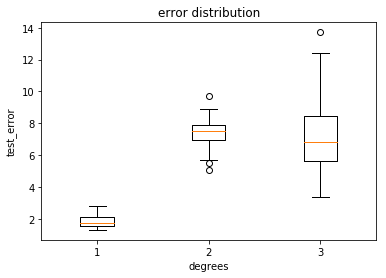

In [43]:
def test_error_distribution_demo():
    """The entry."""
    # define parameters
    seeds = range(50)
    num_data = 10000
    lambdas = np.logspace(-6, 6, 50)

    ratio_train = 0.005
    degrees = range(2, 5)
    
    # define list to store the variable
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # split data with a specific seed
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        k_fold = 4
        k_indices = build_k_indices(y_tr, k_fold, 1)
        
        for index_degree, degree in enumerate(degrees):
            # form polynomial data
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            
            
            # selecting best lambda
            rmse_te_tmp = []
            ws = []
            for lambda_ in lambdas:
                rmse_te_tmp2 = []
                ws_tmp = []
                for k in range(k_fold):
                    _, loss_te, w = cross_validation(y_tr, x_tr, k_indices, k, lambda_, degree)
                    ws_tmp.append(w)
                    rmse_te_tmp2.append(loss_te)
                rmse_te_tmp.append(np.mean(rmse_te_tmp2))
                ws.append(ws_tmp)
            ind_lambda_opt = np.argmin(rmse_te_tmp)
            ws_opt = ws[ind_lambda_opt]
            lambda_opt = lambdas[ind_lambda_opt]
            
            # calculate the rmse for test
            rmse_te[index_seed, index_degree] =  np.mean([np.sqrt(2 * compute_loss(y_te, tx_te, w)) for w in ws_opt])

    plt.boxplot(rmse_te)
    plt.title("error distribution")
    plt.xlabel("degrees")
    plt.ylabel("test_error")
    
    plt.semilogx(lambdas, acc_te, color='b', marker='*', label="Accuray")
    #plt.semilogx(lambdas, mse_te, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("accuracy")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression")
    
test_error_distribution_demo()
